<a href="https://colab.research.google.com/github/RobertPhamDA/getdataonweb/blob/main/getdatathpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive/")
df1 = pd.read_excel('/content/gdrive/MyDrive/python_sample/Book1.xlsx')
df1

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


,province_code,province_name
0,1,Hà Nội
1,2,HCM
2,3,Hải Phòng
3,4,Đà Nẵng
4,5,Hà Giang
...,...,...
58,60,Bạc Liêu
59,61,Cà Mau
60,62,Điện Biên
61,63,Đăk Nông


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   province_code  63 non-null     int64 
 1   province_name  63 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df1['province_code'] = df1['province_code'].astype(str)
df1

,province_code,province_name
0,1,Hà Nội
1,2,HCM
2,3,Hải Phòng
3,4,Đà Nẵng
4,5,Hà Giang
...,...,...
58,60,Bạc Liêu
59,61,Cà Mau
60,62,Điện Biên
61,63,Đăk Nông


In [5]:
df1['province_code'] = df1.province_code.apply(lambda x: str(0)+x if len(x)<2 else x)
df1

,province_code,province_name
0,01,Hà Nội
1,02,HCM
2,03,Hải Phòng
3,04,Đà Nẵng
4,05,Hà Giang
...,...,...
58,60,Bạc Liêu
59,61,Cà Mau
60,62,Điện Biên
61,63,Đăk Nông


In [6]:
import pandas as pd
import requests

sbd_start = 34000001
sbd_end = 34000210

df_list = []

# Create a session for improved performance
session = requests.Session()

for sbd in range(sbd_start, sbd_end):
    url = f"https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2023/{sbd}.html"

    response = session.get(url)
    if response.ok:
            tables = pd.read_html(url)
            desired_table = tables[0].transpose()
            desired_table.columns = desired_table.iloc[0]
            desired_table = desired_table[1:]
            desired_table['SBD'] = sbd

            df_list.append(desired_table)
    else:
        pass  # Skip the current SBD if the URL does not exist (404 Not Found)

df = pd.concat(df_list, ignore_index=True)

session.close()  # Close the session after use

df

Môn,Toán,Lí,Hóa,Sinh,Văn,Ngoại ngữ,SBD,Sử,Địa,GDCD
0,8.2,8.25,8.5,8.0,7.5,6.8,34000001,NaN,NaN,NaN
1,3.2,NaN,NaN,NaN,5.0,2.8,34000002,3.0,4.0,3.0
2,7.6,7.25,8.5,5.5,6.75,4.0,34000003,NaN,NaN,NaN
3,7.4,NaN,NaN,NaN,8.25,4.4,34000004,6.75,8.0,9.5
4,8.6,9.0,7.25,7.0,4.5,5.4,34000005,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
204,7.4,NaN,NaN,NaN,7.0,6.6,34000205,9.25,8.5,9.5
205,8.2,7.0,7.75,6.25,6.75,5.0,34000206,NaN,NaN,NaN
206,6.8,NaN,NaN,NaN,6.25,5.4,34000207,7.0,5.25,8.75
207,6.0,NaN,NaN,NaN,7.0,5.2,34000208,8.75,7.25,9.5


In [7]:
df['SBD'] = df['SBD'].astype(str)
df['province_code'] = df['SBD'].str.slice(0,2)
df0 = pd.merge(df,df1,on='province_code')
df0

,Toán,Lí,Hóa,Sinh,Văn,Ngoại ngữ,SBD,Sử,Địa,GDCD,province_code,province_name
0,8.2,8.25,8.5,8.0,7.5,6.8,34000001,NaN,NaN,NaN,34,Quảng Nam
1,3.2,NaN,NaN,NaN,5.0,2.8,34000002,3.0,4.0,3.0,34,Quảng Nam
2,7.6,7.25,8.5,5.5,6.75,4.0,34000003,NaN,NaN,NaN,34,Quảng Nam
3,7.4,NaN,NaN,NaN,8.25,4.4,34000004,6.75,8.0,9.5,34,Quảng Nam
4,8.6,9.0,7.25,7.0,4.5,5.4,34000005,NaN,NaN,NaN,34,Quảng Nam
...,...,...,...,...,...,...,...,...,...,...,...,...
204,7.4,NaN,NaN,NaN,7.0,6.6,34000205,9.25,8.5,9.5,34,Quảng Nam
205,8.2,7.0,7.75,6.25,6.75,5.0,34000206,NaN,NaN,NaN,34,Quảng Nam
206,6.8,NaN,NaN,NaN,6.25,5.4,34000207,7.0,5.25,8.75,34,Quảng Nam
207,6.0,NaN,NaN,NaN,7.0,5.2,34000208,8.75,7.25,9.5,34,Quảng Nam


In [8]:
df0 = pd.merge(df,df1,on='province_code')
df0

,Toán,Lí,Hóa,Sinh,Văn,Ngoại ngữ,SBD,Sử,Địa,GDCD,province_code,province_name
0,8.2,8.25,8.5,8.0,7.5,6.8,34000001,NaN,NaN,NaN,34,Quảng Nam
1,3.2,NaN,NaN,NaN,5.0,2.8,34000002,3.0,4.0,3.0,34,Quảng Nam
2,7.6,7.25,8.5,5.5,6.75,4.0,34000003,NaN,NaN,NaN,34,Quảng Nam
3,7.4,NaN,NaN,NaN,8.25,4.4,34000004,6.75,8.0,9.5,34,Quảng Nam
4,8.6,9.0,7.25,7.0,4.5,5.4,34000005,NaN,NaN,NaN,34,Quảng Nam
...,...,...,...,...,...,...,...,...,...,...,...,...
204,7.4,NaN,NaN,NaN,7.0,6.6,34000205,9.25,8.5,9.5,34,Quảng Nam
205,8.2,7.0,7.75,6.25,6.75,5.0,34000206,NaN,NaN,NaN,34,Quảng Nam
206,6.8,NaN,NaN,NaN,6.25,5.4,34000207,7.0,5.25,8.75,34,Quảng Nam
207,6.0,NaN,NaN,NaN,7.0,5.2,34000208,8.75,7.25,9.5,34,Quảng Nam


In [9]:
df.columns

Index(['Toán', 'Lí', 'Hóa', 'Sinh', 'Văn', 'Ngoại ngữ', 'SBD', 'Sử', 'Địa',
       'GDCD', 'province_code'],
      dtype='object', name='Môn')

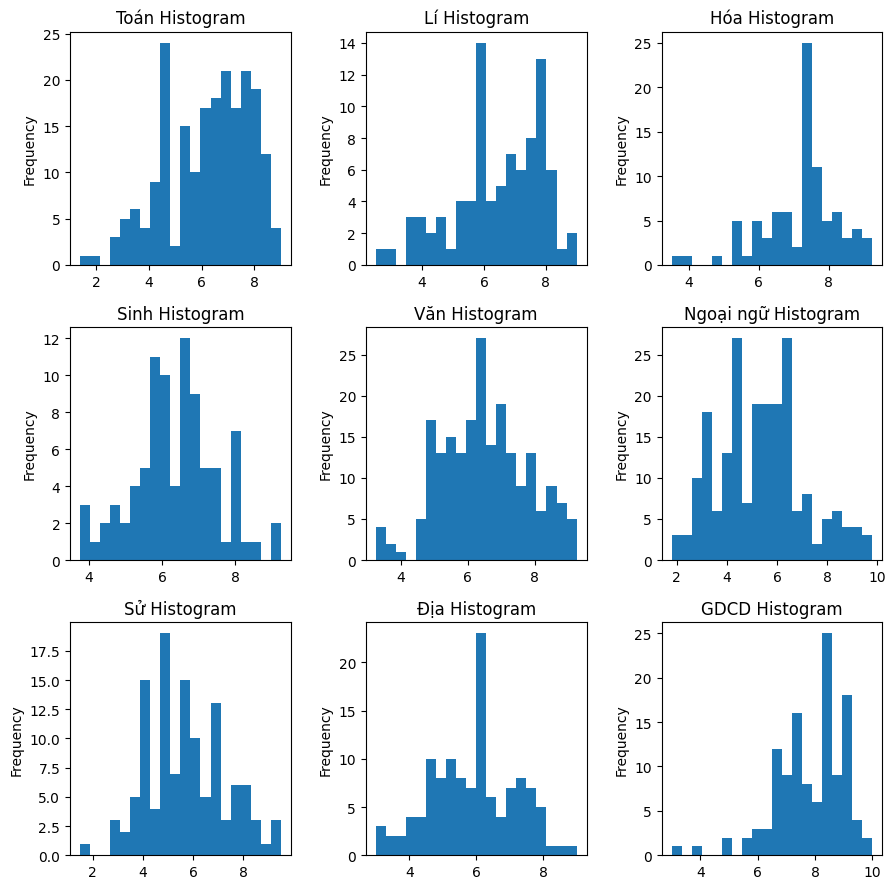

In [11]:
import matplotlib.pyplot as plt

# Create a 3x3 grid of histograms for each subject
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))

subjects = ["Toán", "Lí", "Hóa", "Sinh", "Văn", "Ngoại ngữ", "Sử", "Địa", "GDCD"]

for i, subject in enumerate(subjects):
    row = i // 3  # Calculate row index
    col = i % 3   # Calculate column index

    df[subject].plot(kind="hist", bins=20, ax=axes[row, col], title=f"{subject} Histogram")

plt.tight_layout()
plt.show()
